In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
plt.style.use('fivethirtyeight')

# Happy Valentine's Linkage


In this notebook, you step through the process of defining the
kinematics of a [four-bar
linkage](https://en.wikipedia.org/wiki/Four-bar_linkage) that can draw a
heart.
[__Kinematics__](https://en.wikipedia.org/wiki/Kinematics#Kinematic_constraints)
is the study of the geometry of motion. In this notebook, you predict
and draw the geometry of three moving links. To create this solution you
will:

- solve a series of nonlinear equations using
  [`fsolve`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html)
- use solutions to create 2D
  [arrays](https://numpy.org/doc/stable/reference/generated/numpy.array.html) that vary in time and
  location
- plot and animate the motion of the four-bar linkage

When you accomplish these steps you will learn:

- How to set up and solve nonlinear equations
- How to describe position and orientation
- How to use NumPy, Scipy, and Matplotlib to create HTML animations
- Why four-bar linkages are so cool

## Background

The four-bar linkages consist of 3 moving parts connected to a
stationary support. Depending upon the desired output motion, you can
vary the lengths of each moving arm, $l_1,~l_2,~and,l_3$, and the
support locations, $d_x~and~d_y$. A four-bar linkage is an amazing
__1-degree-of-freedom__ system. If one angle is fixed, all of the
positions and angles have to be fixed too. Using some trigonometry, you
can arrive at these two constraint equations that relate
$\theta_1,~\theta_2,~and~\theta_3$:

![Diagram of a general four-bar linkage](./images/4bar-general.svg)

1. $l_1\sin\theta_1+l_2\sin\theta_2-l_3\sin\theta_3 -d_y = 0$
2. $l_1\cos\theta_1+l_2\cos\theta_2-l_3\cos\theta_3 -d_x = 0$

If you have one of the angles, e.g. $\theta_1$, you use equations 1 and 2
to solve for the other two angles, $\theta_2~and\theta_3$. Here you can
create a function and
use `fsolve`. The function input is a vector with two values and the output is a
vector with two values. 

$\bar{f}(\bar{x})= \left[\begin{array}{c}
f_1(\theta_2,~\theta_3) \\ 
f_2(\theta_2,~\theta_3)\end{array}\right]=\left[\begin{array}{c}
l_1\sin\theta_1+l_2\sin\theta_2-l_3\sin\theta_3 -d_y\\
l_1\cos\theta_1+l_2\cos\theta_2-l_3\cos\theta_3 -d_x
\end{array}\right]$

## Defining your system

The heart-drawing linkage system has the following properties:

![diagram of the heart-drawing linkage system](./images/4bar-heart.svg)

- link 1: $l_1 = 1~m$
- link 2: $l_2 = 1~m$
- link 3: $l_3 = 1~m$
- support: $d_x=0.95~m~and~d_y=0~m$

The constraint function is defined below as `Fbar`, a function of
$\theta_1$ and an array of $[\theta_2,~\theta_3]$ as such,

In [2]:
l1 = 1
l2 = 1
l3 = 1
a1 = np.pi/2
dy = 0
dx = 0.95
Fbar = lambda a1,x: np.array([l1*np.sin(a1)+l2*np.sin(x[0])-l3*np.sin(x[1])-dy,
                           l1*np.cos(a1)+l2*np.cos(x[0])-l3*np.cos(x[1])-dx])

## Solve for one configuration

Now, solve `Fbar` using
[`scipy.optimize.fsolve`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html).
The inputs are a function, `Fbar`, and an initial guess, `x0`. You have
to use `lambda` again to set the angle $\theta_1$ as `a1 = np.pi/2`


In [3]:
a1 = np.pi/2
x0 = np.array([0,np.pi/2])
xsol = fsolve(lambda x: Fbar(a1, x), x0)

The configuration for $\theta_1=\frac{\pi}{2}$ is now saved in `xsol`.
To look at the system in this state, define the positions of each hinge
and the center of link 2 as such,

__x- and y-locations of hinges__:
* $rx = \left[\begin{array}~0\\l_1\cos(\theta_1)\\l_1\cos(\theta_1)+l_2\cos(\theta_2)\\ l_1\cos(\theta_1) + l_2\cos(\theta_2)-l_3\cos(\theta_3)\end{array}\right]$
* $ry = \left[\begin{array}~0\\l_1\sin(\theta_1)\\l_1\sin(\theta_1)+l_2\sin(\theta_2)\\ l_1\sin(\theta_1)+l_2\sin(\theta_2)-l_3\sin(\theta_3)\end{array}\right]$

__x- and y-location of point P__:
* $rx = \left[\begin{array}~l_1\cos(\theta_1)+l_2\cos(\theta_2)\end{array}\right]$
* $ry = \left[\begin{array}~l_1\sin(\theta_1)+l_2\sin(\theta_2)\end{array}\right]$

In the Python cell, you define `rx` and `ry` to draw the three moving
links and `rpx` and `rpy` that define point P as such,

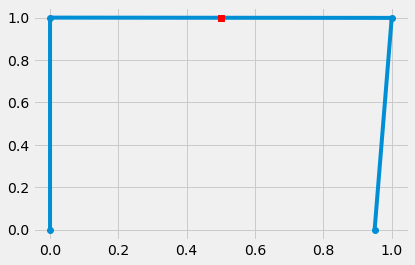

In [4]:
rx = np.array([0,
               l1*np.cos(a1),
               l1*np.cos(a1)+l2*np.cos(xsol[0]), 
               l1*np.cos(a1)+l2*np.cos(xsol[0])-l3*np.cos(xsol[1])])
ry = np.array([0,
               l1*np.sin(a1),
               l1*np.sin(a1)+l2*np.sin(xsol[0]), 
               l1*np.sin(a1)+l2*np.sin(xsol[0])-l3*np.sin(xsol[1])])
rpx = l1*np.cos(a1)+l2/2*np.cos(xsol[0])
rpy = l1*np.sin(a1)+l2/2*np.sin(xsol[0])

plt.plot(rx,ry,'o-')
plt.plot(rpx,rpy,'rs')
#plt.axis([-0.5, 1.5, -0.6, 0.6])

## Solve for the whole cycle

You have verified the solution works for one angle, `a1`. Now, you can
create an array of `a1` and solve for the angles at each configuration
as you rotate link 1.

1. define `a1` as a
[`linspace`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)
2. initialize `a2` and `a3` as zeros with `a1.shape`
3. use a for-loop to `fsolve` each angle `a2` and `a3` given `a1`
4. save the values of `a2` and `a3` in each step

In [5]:
a1 = np.linspace(-np.pi/2,3*np.pi/2,500)
a2 = np.zeros(a1.shape) # initialize
a3 = np.zeros(a1.shape) # initialize
for i, a in enumerate(a1):
    xsol = fsolve(lambda x: Fbar(a,x), xsol) # solve
    a2[i] = xsol[0] # save value for a2
    a3[i] = xsol[1] # save value for a3
    

### Verify cycle solution

Now, you can see how the functions, $\theta_2=f_{\theta_2}(\theta_1)$ and
$\theta_3=f_{\theta_3}(\theta_1)$. This is another verification step, to
see if there are any discontinuities in the solution that could cause
problems. 

Text(0, 0.5, 'output: angles (degrees)')

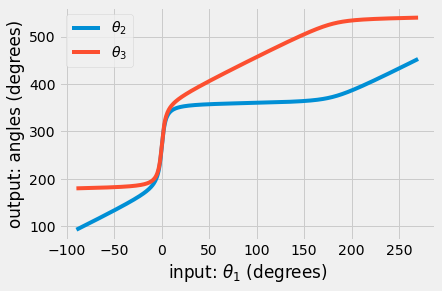

In [6]:
plt.plot(a1*180/np.pi, a2*180/np.pi, label = r'$\theta_2$')
plt.plot(a1*180/np.pi, a3*180/np.pi, label = r'$\theta_3$')
plt.legend()
plt.xlabel(r'input: $\theta_1$ (degrees)')
plt.ylabel('output: angles (degrees)')

## Time to animate

Now, you are ready to animate. You have the angles for the entire cycle
of motion for the four-bar linkage. Now, you need to import
[`matplotlib.animation`](https://matplotlib.org/stable/api/animation_api.html)
and
[`IPython.display.HTML`](https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html#IPython.display.HTML). 

### Import functions

In [7]:
from matplotlib import animation
from IPython.display import HTML

These two functions allow you:
1. create an animation
2. display it in a browser

### Define lines and paths

Then, use the solutions for `a1`, `a2`, and `a3` to plot the hinge
locations and point P as such

In [8]:
rx = np.array([np.zeros(a1.shape),
               l1*np.cos(a1),
               l1*np.cos(a1)+l2*np.cos(a2), 
               l1*np.cos(a1)+l2*np.cos(a2)-l3*np.cos(a3)])
ry = np.array([np.zeros(a1.shape),
               l1*np.sin(a1),
               l1*np.sin(a1)+l2*np.sin(a2), 
               l1*np.sin(a1)+l2*np.sin(a2)-l3*np.sin(a3)])

rpx = l1*np.cos(a1)+l2/2*np.cos(a2)
rpy = l1*np.sin(a1)+l2/2*np.sin(a2)

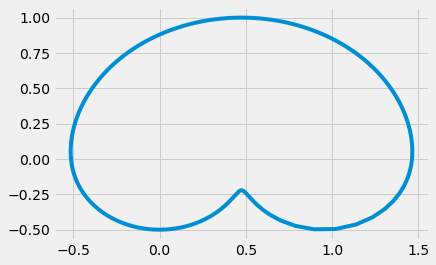

In [9]:
plt.plot(rpx,rpy)


### Set up figure and axes
Plotting just the solution for point P's path, you see the heart shape
is upside-down. In the animation, you can reverse the y-axis to flip the
drawing. Here, you set up the figure to create the animation:

* `ax`: axis for plotting the lines
* `line1`: lines that draw the three moving links `rx` and `ry`
* `line2`: line that updates the heart drawing as links move along paths

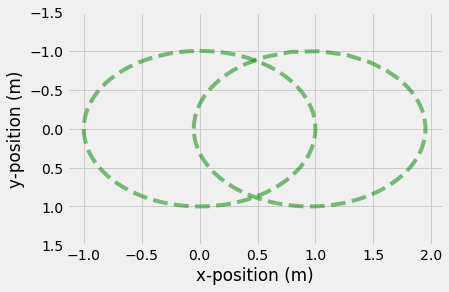

In [10]:
fig, ax = plt.subplots()

#ax.set_xlim(( -30, 30))
ax.set_ylim((1.5, -1.5))
ax.set_xlabel('x-position (m)')
ax.set_ylabel('y-position (m)')

line1, = ax.plot([], [],'bo-')
line2, = ax.plot([], [],'r')
ax.plot(rx[1,:],ry[1,:],'g--', alpha=0.5)
ax.plot(rx[2,:],ry[2,:],'g--', alpha=0.5)

### Define initializing and animation functions

Create an initializing (`init`) function that clears the previous
lines

In [11]:
def init():
    line1.set_data([], [])
    line2.set_data([], [])
    return (line1, line2, )

Create an animating (`animate`) function that updates the lines. The
links should be drawn for a given column, i.e. `line1` is defined as
`rx[:, i]` and `ry[:, i]`, but you want the path of the heart up to the
current frame i.e. line2 is defined as `rpx[:i]` and `rpy[:i]`.

In [12]:
def animate(i):
    '''function that updates the line and marker data
    arguments:
    ----------
    i: index of timestep
    outputs:
    --------
    line: the line object plotted in the above ax.plot(...)
    '''
    line1.set_data(rx[:, i], ry[:,i])
    line2.set_data(rpx[:i], rpy[:i])
    return (line1, line2 )

### Create the animation and display

Create an animation (`anim`) variable using the `animation.FuncAnimation`

In [13]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=range(0,len(a1)), interval=10, 
                               blit=True)

In [14]:
HTML(anim.to_html5_video())

## Wrapping up

There you have it, a heart-drawing four-bar linkage. This solution
required arrays, nonlinear solutions, and some trigonometry to
build locations of hinges and links. 

Try changing the lengths the different links or changing the fixed
positions. What else can you draw?
